In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('exchange_rate.csv')

In [3]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
data.shape

(7588, 2)

In [5]:
#converting into date time format incase in other format
data['date'] = pd.to_datetime(data['date'])

In [6]:
#return minimum and maximum value
data['date'].min(),data['date'].max()

(Timestamp('1990-01-01 00:00:00'), Timestamp('2010-12-09 00:00:00'))

In [7]:
#arrange in ascending order
data = data.sort_values('date',ascending=True)

In [8]:
data.head()

,date,Ex_rate
0,1990-01-01,0.7855
31,1990-01-02,0.7500
59,1990-01-03,0.7471
90,1990-01-04,0.7587
120,1990-01-05,0.7852


In [9]:
#checking for null values
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [10]:
data.tail()

,date,Ex_rate
7436,2010-12-05,0.760427
7467,2010-12-06,0.756344
7497,2010-12-07,0.765931
7528,2010-12-08,0.767548
7559,2010-12-09,0.745045


In [11]:
#check at what dates the sales is maximum
data['date'].value_counts()

1990-01-01    1
2003-11-03    1
2003-11-15    1
2003-11-14    1
2003-11-13    1
             ..
1996-11-30    1
1996-11-29    1
1996-11-28    1
1996-11-27    1
2010-12-09    1
Name: date, Length: 7588, dtype: int64

In [12]:
data = data.groupby('date')['Ex_rate'].sum().reset_index()
data.shape

(7588, 2)

In [13]:
# set index by date
data = data.set_index('date')

In [14]:
data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7500
1990-01-03,0.7471
1990-01-04,0.7587
1990-01-05,0.7852


In [15]:
data.shape

(7588, 1)

In [16]:
# if any date is missing or weekend is holiday for next monday is considered as last weekends saturday
# daily data converted into monthly data
# monthly-M ,Yearly-Y,weekly-W
y = data['Ex_rate'].resample("M").mean()
y.shape

(252,)

In [17]:
print(y)

date
1990-01-31    0.769661
1990-02-28    0.765589
1990-03-31    0.768568
1990-04-30    0.777073
1990-05-31    0.784868
                ...   
2010-08-31    0.752128
2010-09-30    0.742300
2010-10-31    0.749748
2010-11-30    0.753275
2010-12-31    0.752940
Freq: M, Name: Ex_rate, Length: 252, dtype: float64


<Axes: xlabel='date'>

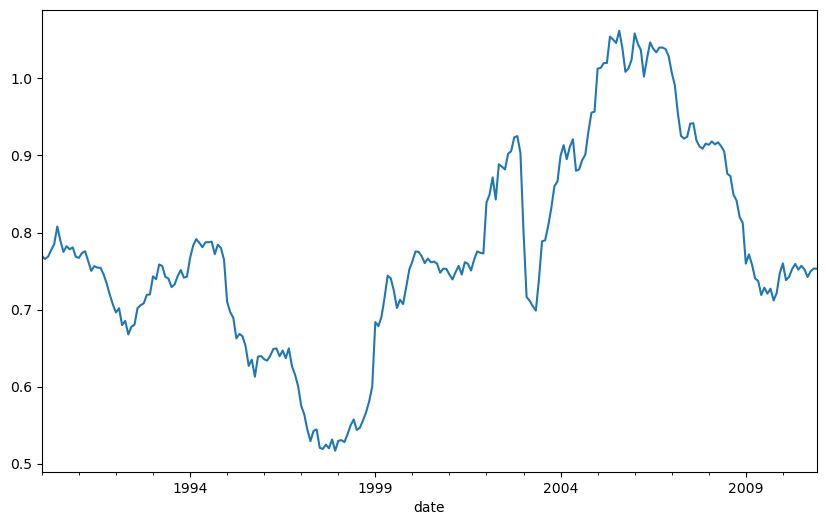

In [18]:
#plot a diagram
#plt.figure(y,figsize=(10,6))
y.plot(figsize=(10,6))

In [19]:
#here we manualy give train and test data for train_test_split  

In [20]:
#before colon -- everything
train = y.loc[:'2005-12-31']
print(train.shape)
train

(192,)


date
1990-01-31    0.769661
1990-02-28    0.765589
1990-03-31    0.768568
1990-04-30    0.777073
1990-05-31    0.784868
                ...   
2005-08-31    1.061955
2005-09-30    1.039895
2005-10-31    1.008593
2005-11-30    1.012989
2005-12-31    1.024522
Freq: M, Name: Ex_rate, Length: 192, dtype: float64

In [21]:
test = y.loc['2006-01-31':]
print(test.shape)
test

(60,)


date
2006-01-31    1.058479
2006-02-28    1.045187
2006-03-31    1.037033
2006-04-30    1.002541
2006-05-31    1.026014
2006-06-30    1.046767
2006-07-31    1.038611
2006-08-31    1.033899
2006-09-30    1.040167
2006-10-31    1.040041
2006-11-30    1.038154
2006-12-31    1.029047
2007-01-31    1.007658
2007-02-28    0.991338
2007-03-31    0.954403
2007-04-30    0.925435
2007-05-31    0.921861
2007-06-30    0.924323
2007-07-31    0.941323
2007-08-31    0.941858
2007-09-30    0.919757
2007-10-31    0.911645
2007-11-30    0.908845
2007-12-31    0.915313
2008-01-31    0.913868
2008-02-29    0.918222
2008-03-31    0.914468
2008-04-30    0.917070
2008-05-31    0.912014
2008-06-30    0.905207
2008-07-31    0.876278
2008-08-31    0.873203
2008-09-30    0.849151
2008-10-31    0.841488
2008-11-30    0.819933
2008-12-31    0.812384
2009-01-31    0.759558
2009-02-28    0.771566
2009-03-31    0.758480
2009-04-30    0.740351
2009-05-31    0.737160
2009-06-30    0.718903
2009-07-31    0.728414
2009-0

<Axes: title={'center': 'USD to AUD Exchange Rate Over Time'}, xlabel='date'>

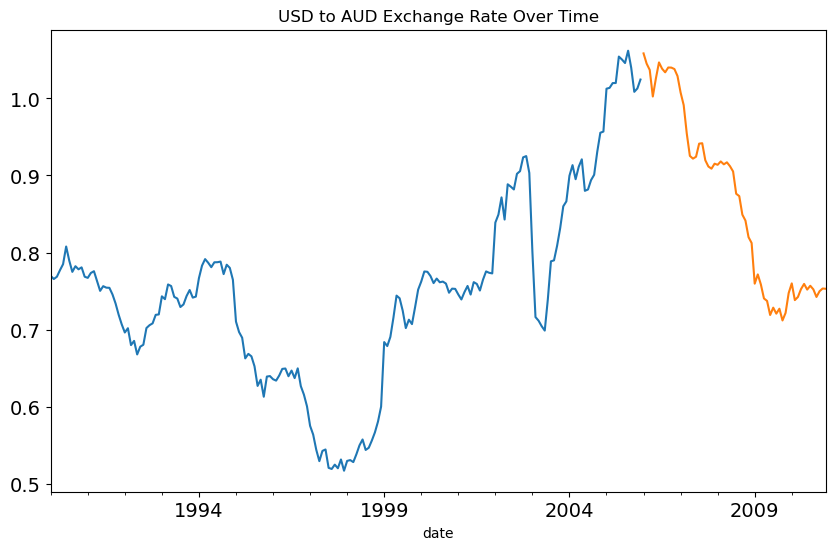

In [22]:
#plotting data
train.plot(figsize=(10,6),title='USD to AUD Exchange Rate Over Time',fontsize=14)
test.plot(figsize=(10,6),title='USD to AUD Exchange Rate Over Time',fontsize=14)

Model Building - ARIMA

In [23]:
import pmdarima as pm
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1272.144, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1285.937, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1282.717, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1274.141, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-1286.015, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-1286.078, Time=0.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-1284.130, Time=0.75 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=-1284.315, Time=0.71 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-1282.297, Time=1.25 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-1272.875, Time=0.21 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=-1287.869, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-1287.178, Time=0.16 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-1285.913, Time=0.83 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=-1286.045, Time=1.33 sec
 ARIM

In [24]:
model.aic()

-1290.13645417304

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


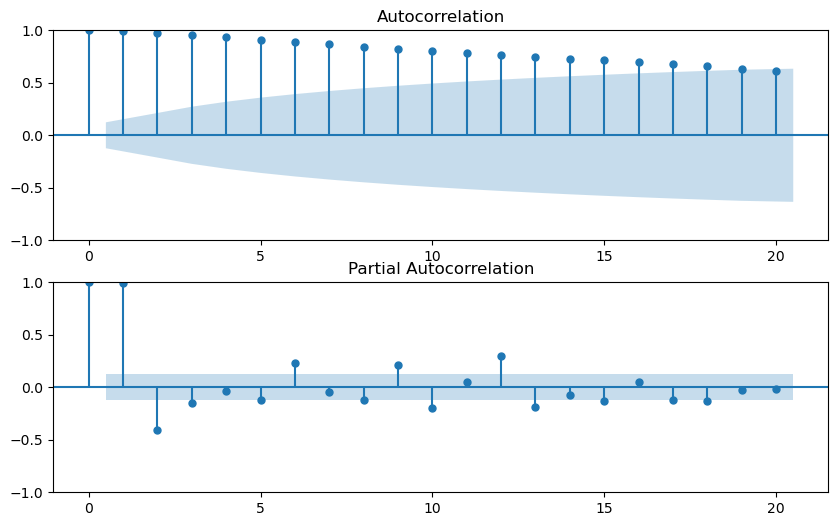

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(y, lags=20, ax=ax[0])
plot_pacf(y, lags=20, ax=ax[1])
plt.show()

In [26]:
#here ACF is exponentially decaying
#and in PACF at one spike is significant others nearly unsignificant

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arima = SARIMAX(train,order=(1,1,1),seasonal_order=(0,0,1,12))
fitted_model = model_arima.fit()

# Print model summary
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Ex_rate   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 487.744
Date:                            Tue, 06 Aug 2024   AIC                           -967.488
Time:                                    02:15:53   BIC                           -954.478
Sample:                                01-31-1990   HQIC                          -962.218
                                     - 12-31-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6579      0.157      4.179      0.000       0.349       0.966
ma.L1         -0.4280      0.170   

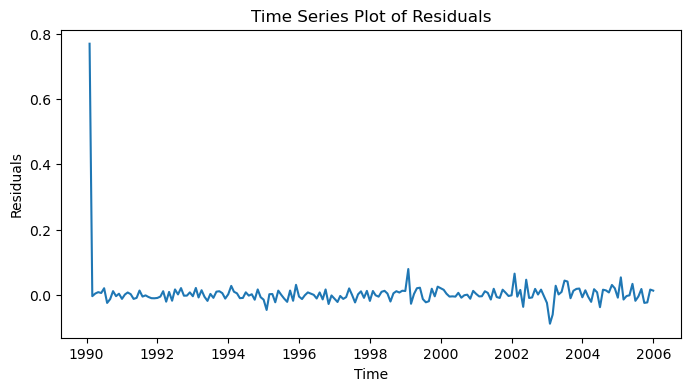

In [28]:
# Plot residuals
residuals = fitted_model.resid

plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('Time Series Plot of Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

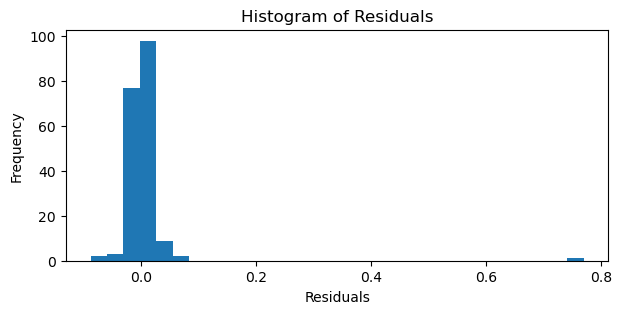

In [29]:
#plot histogram 

plt.figure(figsize=(7, 3))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x400 with 0 Axes>

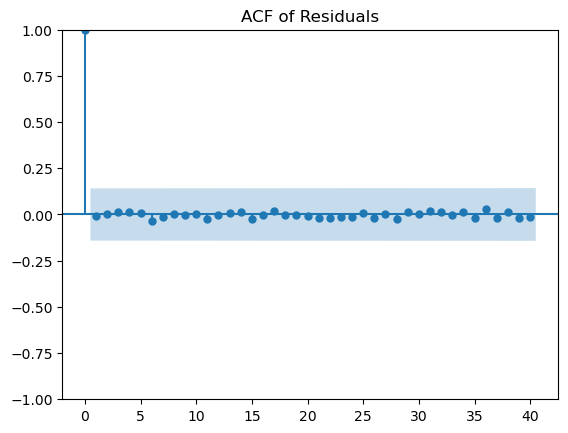

In [30]:
# Plot ACF of residuals
plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  0.404601   0.999998


In [32]:
#here p value is greater than 0.05 so fail to reject null hypothesis
#according to the Ljung-Box test, there is no significant autocorrelation in the residuals up to lag 10.

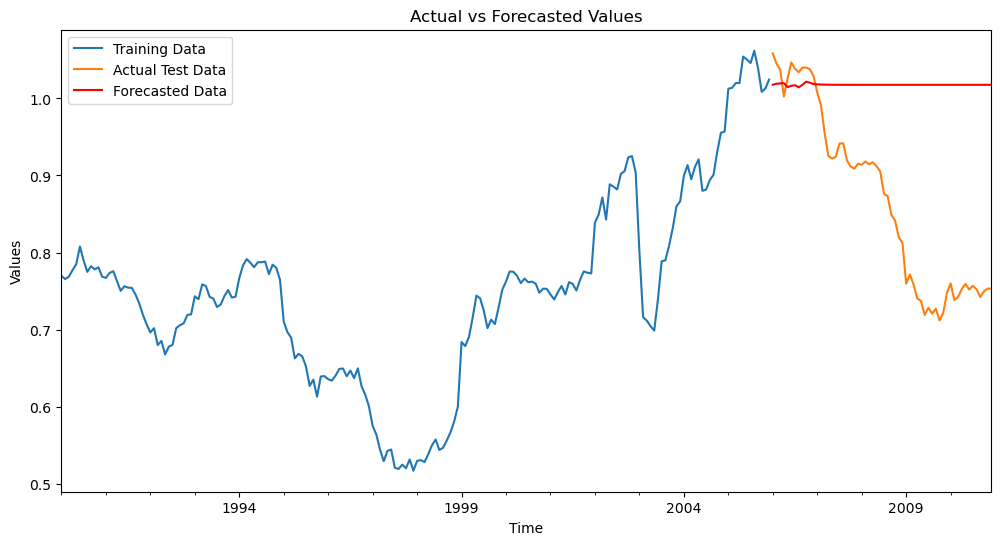

In [33]:
# Forecast the test data
forecast_arima = fitted_model.get_forecast(steps=len(test))

# Extract the predicted mean
forecasted_mean = forecast_arima.predicted_mean

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Training Data')
#plt.plot(test.index, test, label='Actual Test Data')
#plt.plot(test.index, forecasted_mean, label='Forecasted Data', color='red')
train.plot(label='Training Data')
test.plot(label='Actual Test Data')
forecasted_mean.plot(label='Forecasted Data', color='red')
plt.legend()
plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [34]:
forecasted_mean

2006-01-31    1.017782
2006-02-28    1.019082
2006-03-31    1.019551
2006-04-30    1.019838
2006-05-31    1.014753
2006-06-30    1.016435
2006-07-31    1.017106
2006-08-31    1.014467
2006-09-30    1.017704
2006-10-31    1.021771
2006-11-30    1.020440
2006-12-31    1.018641
2007-01-31    1.018307
2007-02-28    1.018088
2007-03-31    1.017944
2007-04-30    1.017849
2007-05-31    1.017786
2007-06-30    1.017745
2007-07-31    1.017718
2007-08-31    1.017700
2007-09-30    1.017689
2007-10-31    1.017681
2007-11-30    1.017676
2007-12-31    1.017673
2008-01-31    1.017670
2008-02-29    1.017669
2008-03-31    1.017668
2008-04-30    1.017667
2008-05-31    1.017667
2008-06-30    1.017667
2008-07-31    1.017667
2008-08-31    1.017667
2008-09-30    1.017666
2008-10-31    1.017666
2008-11-30    1.017666
2008-12-31    1.017666
2009-01-31    1.017666
2009-02-28    1.017666
2009-03-31    1.017666
2009-04-30    1.017666
2009-05-31    1.017666
2009-06-30    1.017666
2009-07-31    1.017666
2009-08-31 

Model Building - Exponential Smoothing

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import ParameterGrid

# Define parameter grid for Holt-Winters
param_grid = {
    'smoothing_level': [0.1, 0.25, 0.15],
    'smoothing_slope': [0.25, 0.01, 0.2],
    'trend': [None, 'add', 'mul'],
    'seasonal': [None, 'add', 'mul'],
    'seasonal_periods': [None, 12, 24]
}
# Perform grid search
best_params = None
best_aic = float('inf')

for params in ParameterGrid(param_grid):
    # Skip invalid combinations
    if (params['trend'] is None and params['seasonal'] is not None) or (params['seasonal'] is not None and params['seasonal_periods'] is None):
        continue
    
    try:
        model = ExponentialSmoothing(train, trend=params['trend'], seasonal=params['seasonal'], seasonal_periods=params['seasonal_periods'])
        fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
        aic = fit.aic
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except (ValueError, np.linalg.LinAlgError) as e:
        # Skip invalid parameter combinations that raise errors
        print(f"Skipping combination {params} due to error: {e}")
        continue

# Fit the best model
best_model = ExponentialSmoothing(train, trend=best_params['trend'], seasonal=best_params['seasonal'], seasonal_periods=best_params['seasonal_periods']).fit(smoothing_level=best_params['smoothing_level'], smoothing_slope=best_params['smoothing_slope'])

# Forecast using the best model
forecast_expo = best_model.forecast(len(test))

# Evaluate the model
mse = ((forecast_expo - test) ** 2).mean()
rmse = np.sqrt(mse)

# Determine the type of model used based on hyperparameters
if best_params['seasonal_periods'] is None:
    if 'smoothing_slope' in best_params:
        model_type = "Holt's Linear Trend Model"
    else:
        model_type = 'Simple Exponential Smoothing (SES)'
else:
    model_type = 'Holt-Winters Seasonal Model'

print(f'Best Parameters: {best_params}')
print(f'RMSE: {rmse}')
print(f'Model Type: {model_type}')

C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params

Best Parameters: {'seasonal': None, 'seasonal_periods': None, 'smoothing_level': 0.25, 'smoothing_slope': 0.25, 'trend': None}
RMSE: 0.19443386809457813
Model Type: Holt's Linear Trend Model


C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sheetal\AppData\Local\Temp\ipykernel_24132\1662095673.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_2413

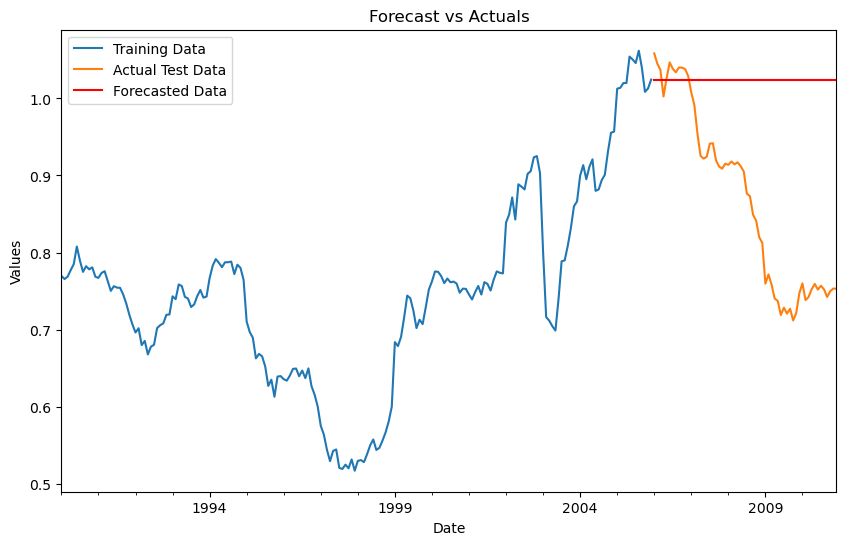

In [36]:
# Plot the results
plt.figure(figsize=(10,6))
train.plot(label='Training Data')
test.plot(label='Actual Test Data')
forecast_expo.plot(label='Forecasted Data', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [37]:
print(best_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                  192
Model:             ExponentialSmoothing   SSE                              0.283
Optimized:                         True   AIC                          -1247.754
Trend:                             None   BIC                          -1241.239
Seasonal:                          None   AICC                         -1247.540
Seasonal Periods:                  None   Date:                 Tue, 06 Aug 2024
Box-Cox:                          False   Time:                         02:15:59
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2500000                alpha                False
initial_level              0.77440

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Evalution metrics on test data of ARIMA')
mse1 = mean_squared_error(test, forecasted_mean)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(test, forecasted_mean)
mape1 = np.mean(np.abs((test - forecasted_mean) / test)) * 100

print(f'MSE: {mse1}')
print(f'RMSE: {rmse1}')
print(f'MAE: {mae1}')
print(f'MAPE: {mape1}')

print()

print('Evalution metrics on test data of Exponential Smoothing')
mse = mean_squared_error(test, forecast_expo)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_expo)
mape = np.mean(np.abs((test - forecast_expo) / test)) * 100

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

Evalution metrics on test data of ARIMA
MSE: 0.03571628715412011
RMSE: 0.18898753174249383
MAE: 0.157192550155712
MAPE: 20.044514432921382

Evalution metrics on test data of Exponential Smoothing
MSE: 0.03780452906221981
RMSE: 0.19443386809457813
MAE: 0.16151623271908638
MAPE: 20.603782774173304


In [ ]:
#for arima - Requires careful parameter selection, which can be computationally intensive.
#           - Assumes linear relationships.

#for Exponential smoothing - May overfit if too many parameters are tuned.
#                          - Limited to multiplicative feature of the seasonality.

# for both Finding the best values for these parameters might require some trial and error or model selection techniques.

In [ ]:
#from above evaluation metrices ARIMA performs better having lower values while Exponential smoothing having very little greater values.